In [69]:
import pandas as pd


In [70]:
datos = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

In [71]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [72]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [73]:
import numpy as np


Next, let's normalize the remaining nested columns and merge them with the existing data.

In [81]:
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

df_normalizado = pd.concat([datos[['customerID', 'Churn']], df_customer.drop(['customerID', 'Churn'], errors='ignore', axis=1), df_phone.drop(['customerID', 'Churn'], errors='ignore', axis=1), df_internet.drop(['customerID', 'Churn'], errors='ignore', axis=1), df_account.drop(['customerID', 'Churn'], errors='ignore', axis=1)], axis=1)

display(df_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [75]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  customerID        7267 non-null   object 


In [78]:
df_normalizado['Charges.Monthly'] = pd.to_numeric(df_normalizado['Charges.Monthly'], errors='coerce')

df_normalizado['Cuentas_Diarias'] = df_normalizado['Charges.Monthly'] / 30

df_normalizado[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head()

df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [79]:
df_normalizado.describe()

,SeniorCitizen,tenure,SeniorCitizen,tenure,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,0.162653,32.346498,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.369074,24.571773,0.369074,24.571773,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,29.000000,0.000000,29.000000,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,0.000000,55.000000,0.000000,55.000000,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,72.000000,1.000000,72.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


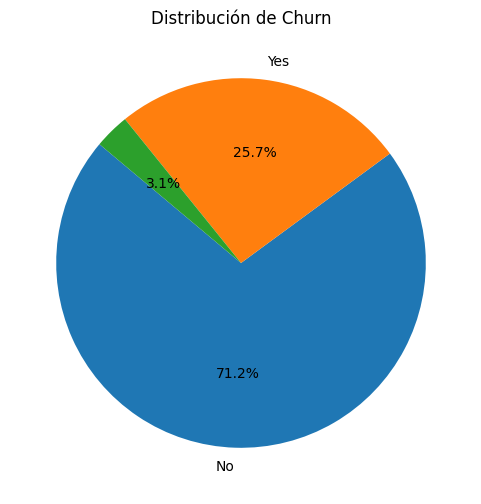

In [83]:
import matplotlib.pyplot as plt

churn_counts = df_normalizado['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Churn')
plt.show()

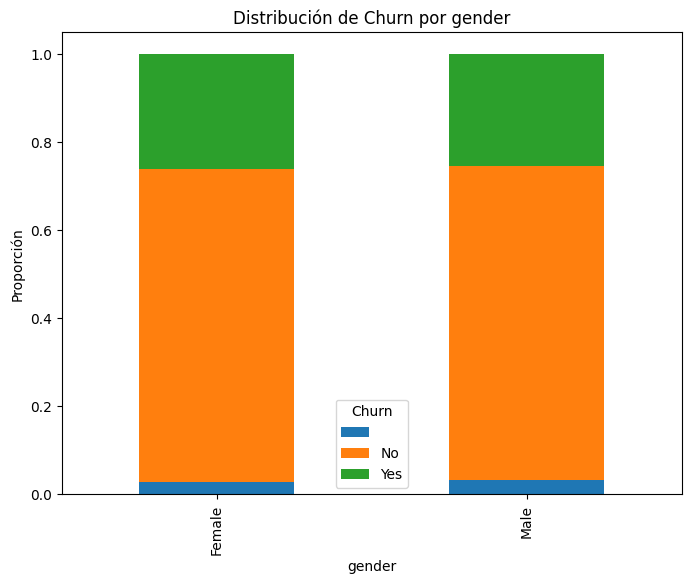

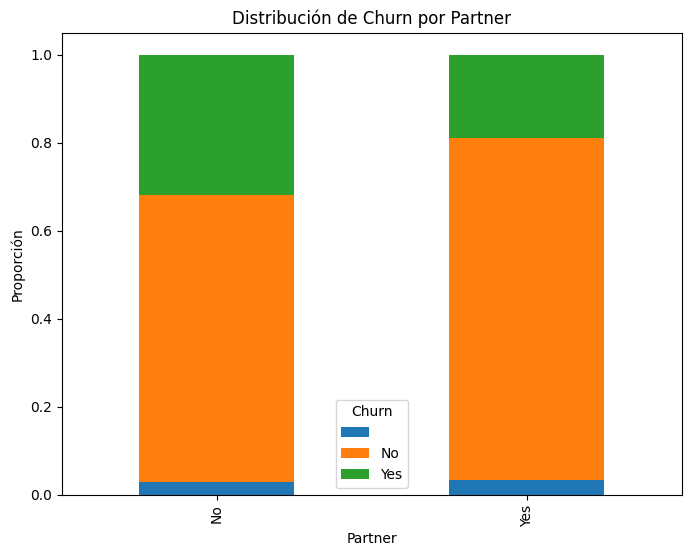

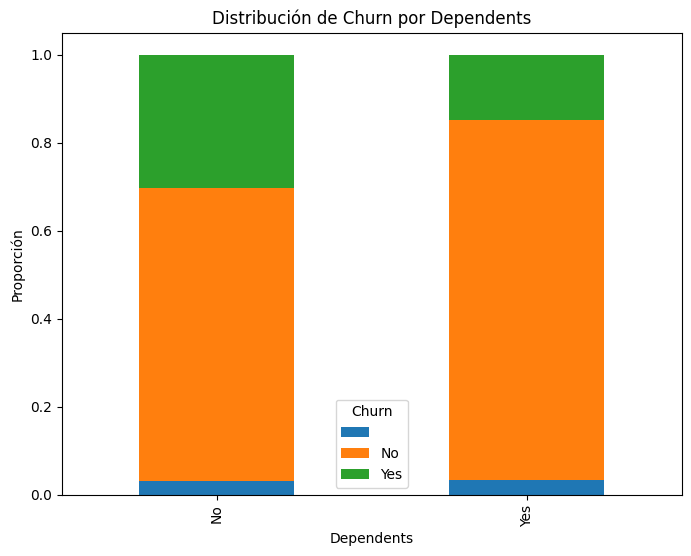

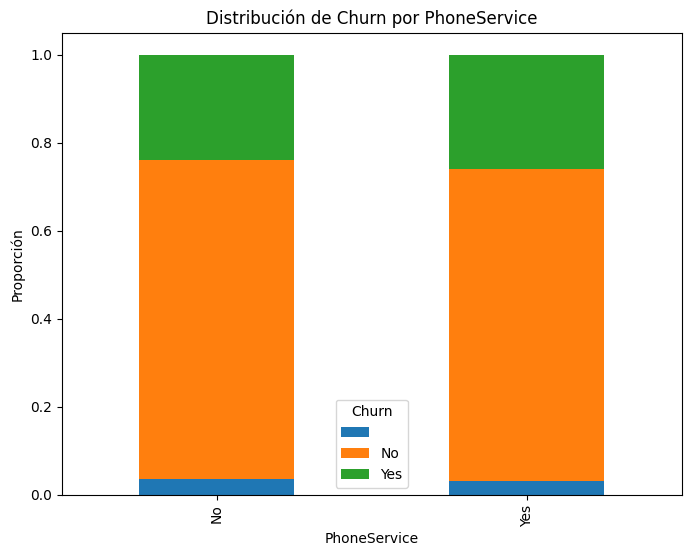

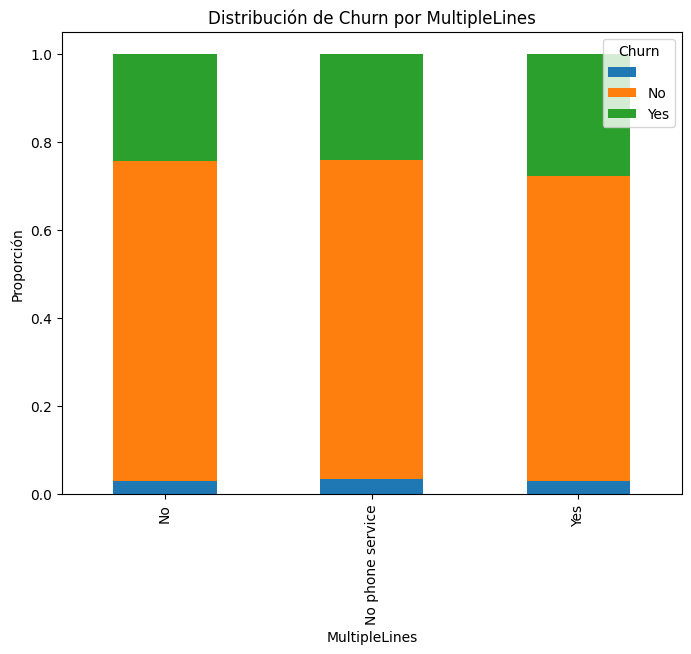

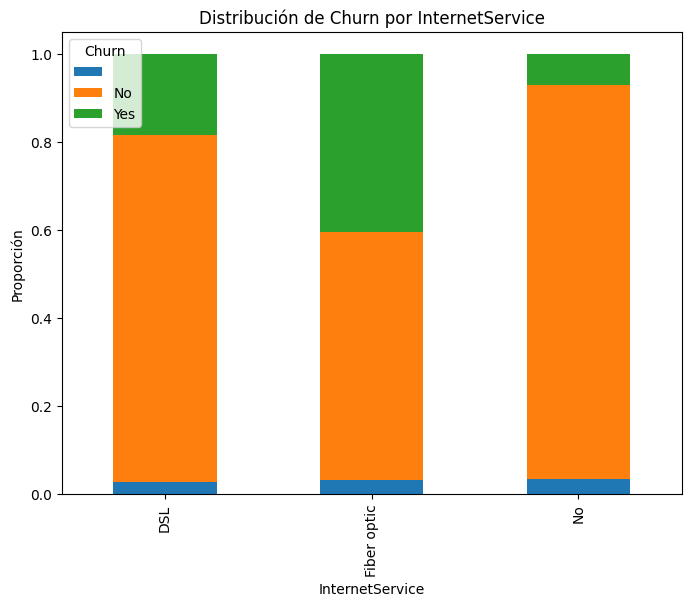

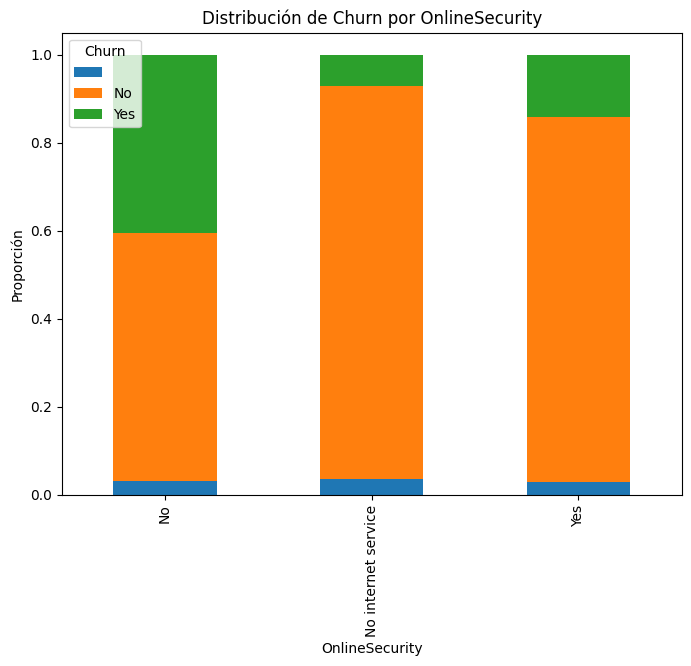

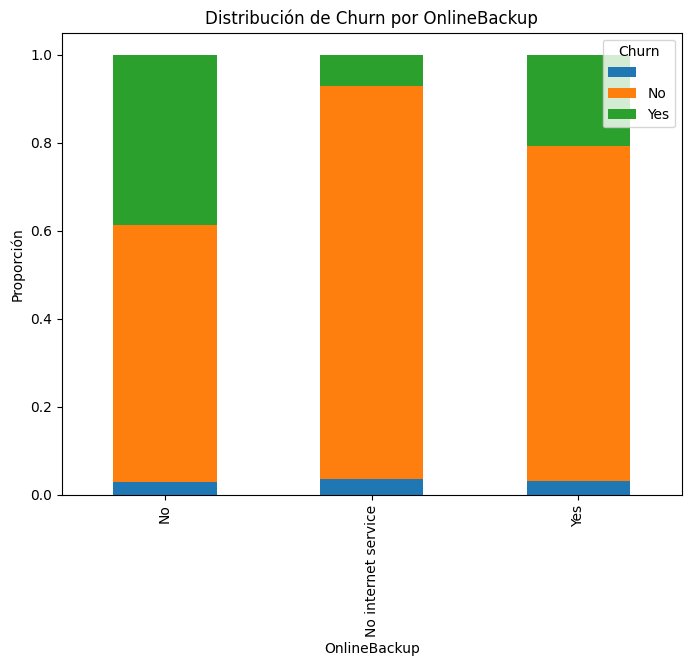

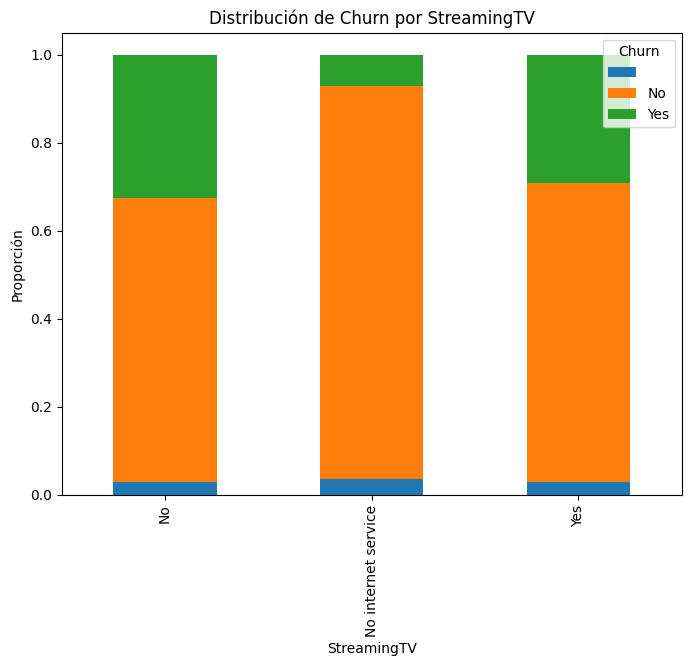

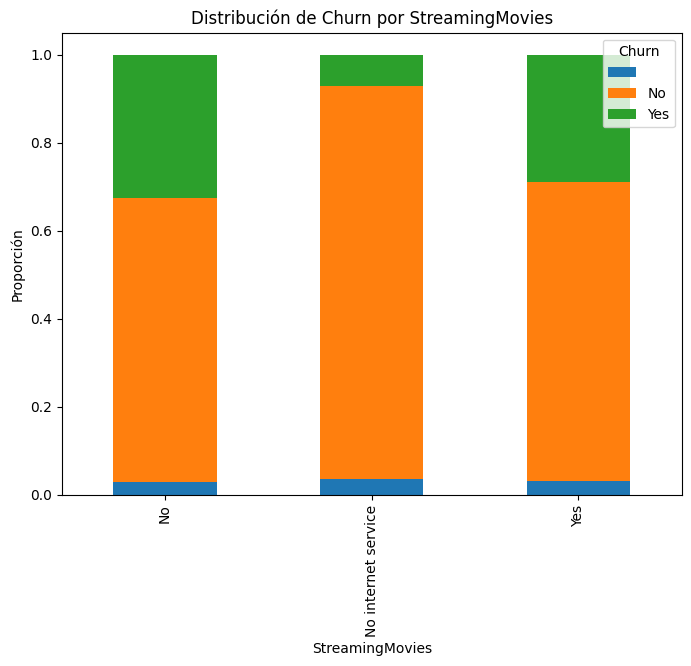

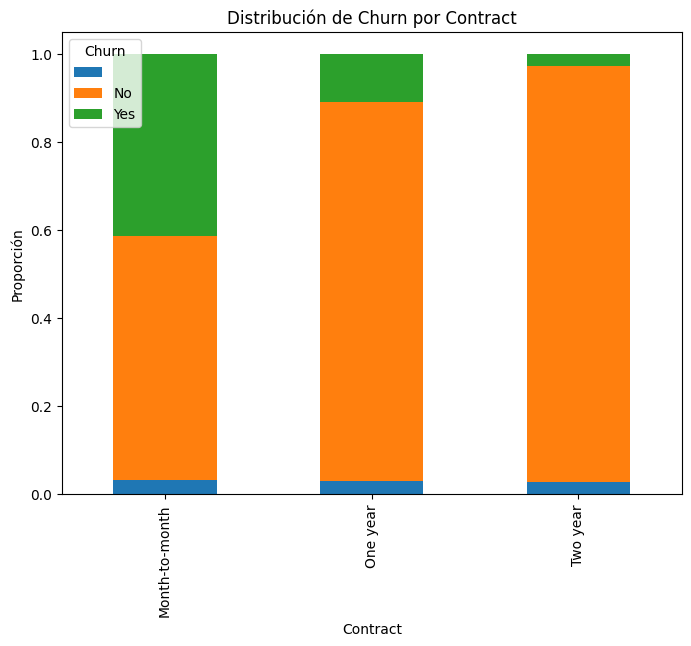

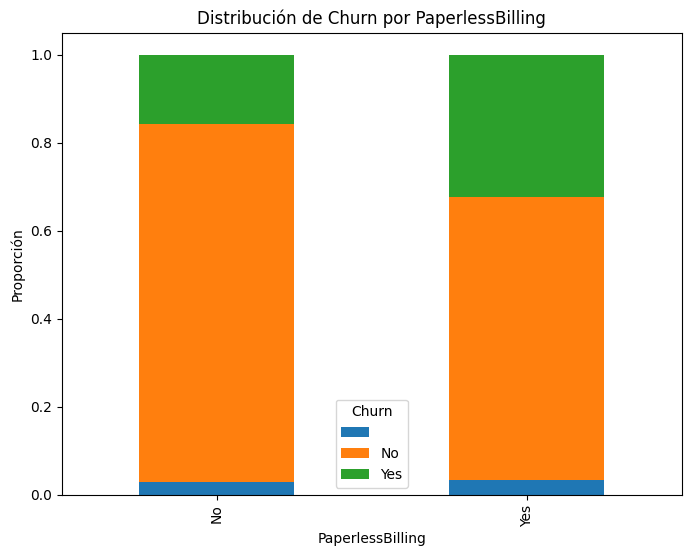

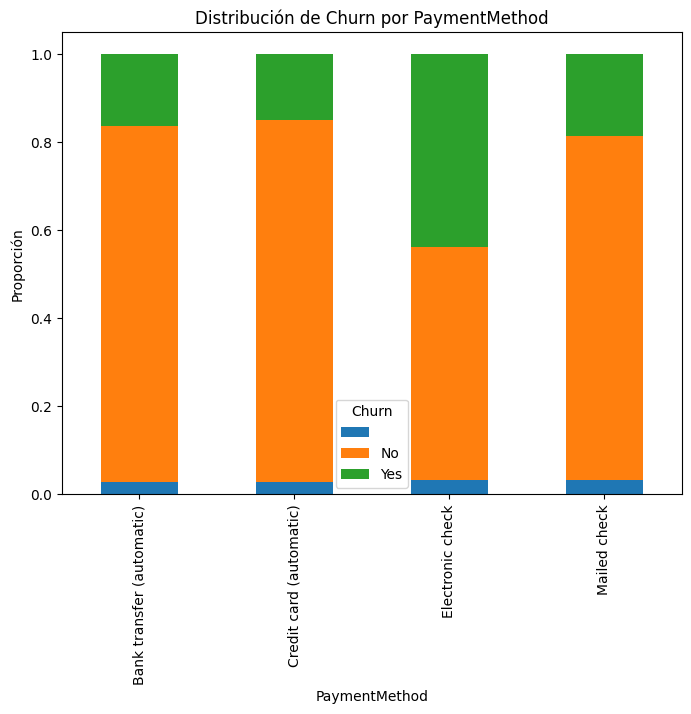

In [85]:
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'ServiceFlags.DeviceProtection', 'ServiceFlags.TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
  if col in df_normalizado.columns:
    churn_distribution = df_normalizado.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_distribution.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f'Distribución de Churn por {col}')
    plt.ylabel('Proporción')
    plt.xlabel(col)
    plt.show()

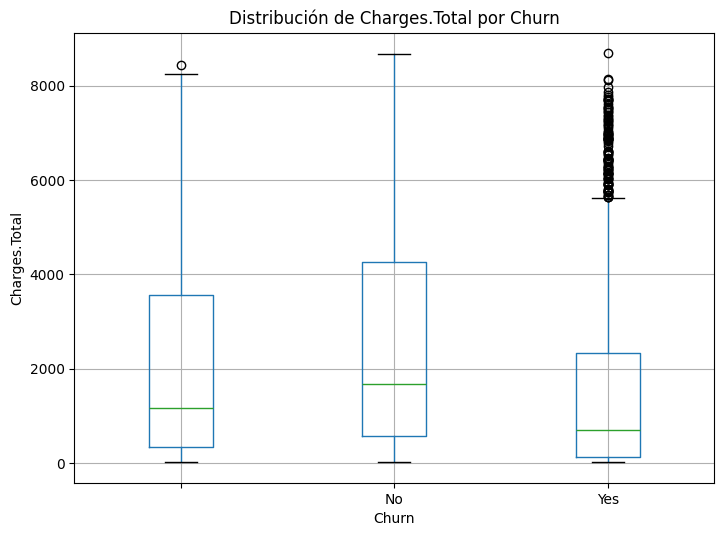

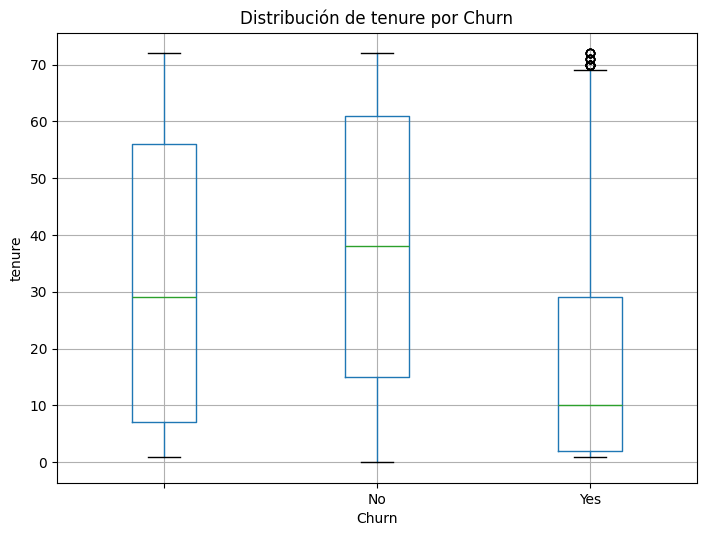

In [88]:
import matplotlib.pyplot as plt
import numpy as np

df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].fillna(df_normalizado['Charges.Total'].median())

num_cols = ['Charges.Total', 'tenure']
for col in num_cols:
    df_normalizado.boxplot(column=col, by='Churn', figsize=(8, 6))
    plt.title(f'Distribución de {col} por Churn')
    plt.suptitle('')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

In [ ]:

## Informe de Análisis de Evasión de Clientes (Churn)

### Introducción

Este informe tiene como objetivo analizar los datos de clientes de TelecomX para comprender los factores que influyen en la evasión de clientes, también conocida como "churn". El churn es un desafío significativo para las empresas de telecomunicaciones, ya que la retención de clientes suele ser más rentable que la adquisición de nuevos. Mediante el análisis de los datos proporcionados, buscaremos identificar patrones y características de los clientes que tienden a abandonar el servicio, con el fin de desarrollar estrategias efectivas de retención.

### Limpieza y Tratamiento de Datos

El primer paso del análisis fue la importación de los datos desde un archivo JSON alojado en un repositorio de GitHub. Los datos presentaban una estructura anidada, por lo que fue necesario normalizarlos utilizando la función `pd.json_normalize` de Pandas. Esto implicó separar la información anidada en columnas individuales para `customer`, `phone`, `internet` y `account`, y luego concatenar estas estructuras normalizadas con las columnas `customerID` y `Churn` del dataframe original.

Durante la inspección inicial de los datos, se identificó que las columnas relacionadas con los cargos ('Charges.Monthly' y 'Charges.Total') estaban en formato de texto. Se procedió a convertir estas columnas a tipo numérico utilizando `pd.to_numeric`. Para la columna 'Charges.Total', se encontró que contenía valores nulos (`NaN`) después de la conversión, lo que probablemente se debía a cadenas de texto vacías o no numéricas. Estos valores nulos se imputaron utilizando la mediana de la columna para mantener la integridad del conjunto de datos.

Además, se calculó una nueva columna, 'Cuentas_Diarias', dividiendo los cargos mensuales por 30 para obtener una estimación del costo diario del servicio, aunque esta columna no fue utilizada extensivamente en el análisis exploratorio de este informe.

### Análisis Exploratorio de Datos

Se realizó un análisis exploratorio exhaustivo para identificar las características de los clientes y su relación con el churn.

La distribución general del churn en el conjunto de datos se visualizó mediante un gráfico de pastel, mostrando la proporción de clientes que han abandonado el servicio frente a los que permanecen. Esta visualización proporciona una visión inicial de la magnitud del problema de churn.

Se analizaron diversas variables categóricas para entender cómo influyen en la tasa de churn. Para cada columna categórica relevante (como género, estado civil, dependientes, tipo de servicio de teléfono e internet, servicios adicionales, tipo de contrato, facturación electrónica y método de pago), se generaron gráficos de barras apiladas. Estos gráficos muestran la distribución de clientes que hacen churn y los que no dentro de cada categoría, permitiendo identificar categorías con tasas de churn significativamente más altas o bajas. Por ejemplo, se observaron diferencias notables en la tasa de churn dependiendo del tipo de servicio de internet, el tipo de contrato y el método de pago.

Finalmente, se examinaron las variables numéricas 'Charges.Total' y 'tenure' (antigüedad del cliente) en relación con el churn utilizando diagramas de caja (boxplots). Estos gráficos muestran la distribución de estas variables para los clientes que hacen churn y los que no. Los boxplots para 'tenure' sugirieron que los clientes con menor antigüedad tienden a tener una tasa de churn más alta. Para 'Charges.Total', los boxplots podrían revelar si existe una relación entre el gasto total del cliente y la probabilidad de churn.

### Conclusiones e Insights

Basado en el análisis exploratorio, se pueden extraer las siguientes conclusiones clave:

*   **Tasa de Churn:** Se determinó la proporción general de clientes que han abandonado el servicio, lo que indica la magnitud del problema de retención en TelecomX.
*   **Influencia de los Servicios y Contratos:** Los gráficos de barras apiladas revelaron que ciertos servicios (como tipos específicos de servicio de internet) y tipos de contrato (especialmente los contratos mes a mes) están asociados con tasas de churn más altas. Esto sugiere que los clientes con estos servicios o contratos son más propensos a irse.
*   **Métodos de Pago:** El método de pago utilizado por los clientes también parece tener un impacto en la tasa de churn, con ciertos métodos mostrando una mayor propensión a la evasión.
*   **Antigüedad del Cliente:** El análisis de 'tenure' indicó que los clientes con menor antigüedad son más susceptibles al churn. Esto resalta la importancia de las estrategias de incorporación y retención temprana.
*   **Impacto de los Cargos Totales:** El análisis de 'Charges.Total' podría indicar si los clientes que gastan más o menos tienden a hacer churn, aunque la relación puede ser compleja y requerir un análisis más profundo.

En general, estos insights sugieren que el churn no es aleatorio, sino que está influenciado por el tipo de servicios que el cliente contrata, su tipo de contrato, su antigüedad y su método de pago.

### Recomendaciones

Basado en los hallazgos de este análisis, se sugieren las siguientes recomendaciones estratégicas para reducir la evasión de clientes en TelecomX:

1.  **Segmentación de Clientes de Alto Riesgo:** Utilizar las características identificadas (tipo de contrato, servicios específicos, antigüedad) para segmentar a los clientes que presentan un alto riesgo de churn.
2.  **Programas de Retención Dirigidos:** Desarrollar programas de retención específicos para los segmentos de alto riesgo. Esto podría incluir ofertas personalizadas, comunicación proactiva, mejoras en el servicio al cliente o incentivos para cambiar a contratos a largo plazo.
3.  **Mejorar la Experiencia de Clientes Nuevos:** Dado que los clientes con menor antigüedad tienen una mayor tasa de churn, es crucial mejorar el proceso de incorporación para los nuevos clientes, asegurando que comprendan completamente los servicios y se sientan valorados desde el principio.
4.  **Análisis Adicional de Métodos de Pago:** Investigar más a fondo por qué ciertos métodos de pago están asociados con tasas de churn más altas y si hay problemas subyacentes en el proceso de pago o facturación que contribuyen a la evasión.
5.  **Evaluar la Rentabilidad por Servicio/Contrato:** Analizar la rentabilidad de los servicios y tipos de contrato que muestran altas tasas de churn. Podría ser necesario ajustar las ofertas o mejorar la calidad del servicio en estas áreas.
6.  **Monitoreo Continuo:** Implementar un sistema de monitoreo continuo para rastrear las métricas de churn y evaluar la efectividad de las estrategias de retención implementadas.

La implementación de estas recomendaciones, respaldadas por el análisis de datos, puede ayudar a TelecomX a reducir la tasa de churn, mejorar la satisfacción del cliente y, en última instancia, aumentar la rentabilidad.